### Image Classification And Recognition Using PCA And SVM

In [1]:
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#pip install scikit-image

In [4]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray

In [5]:
Jhonny = os.listdir('jhonny depp')

In [6]:
Robert = os.listdir('robert downey jr')

In [7]:
Keanu = os.listdir('Keanu Reeves')

#### Reading image as matrix of numbers

In [8]:
limit=10
Jhonny_Depp=[None]*limit
j=0
for i in Jhonny :
    if(j<limit):
        Jhonny_Depp[j]=imread('C:/Users/Admin/HasFas(ML)/jhonny depp/'+i)
        j+=1
    else:
        break

In [9]:
limit=10
Robert_Downey_jr=[None]*limit
j=0
for i in Robert :
    if(j<limit):
        Robert_Downey_jr[j]=imread('C:/Users/Admin/HasFas(ML)/robert downey jr/'+i)
        j+=1
    else:
        break

In [10]:
limit=10
Keanu_Reeves=[None]*limit
j=0
for i in Keanu :
    if(j<limit):
        Keanu_Reeves[j]=imread('C:/Users/Admin/HasFas(ML)/Keanu Reeves/'+i)
        j+=1
    else:
        break

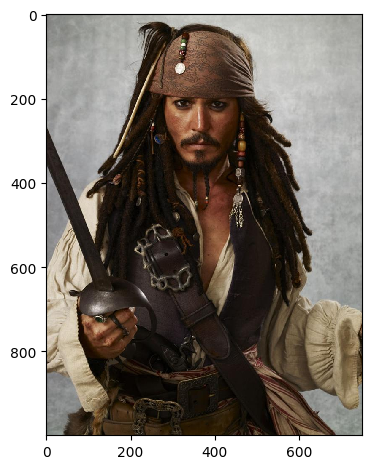

In [11]:
imshow(Jhonny_Depp[2])

### Covert into greyscale

In [12]:
Jhonny_G=[None]*limit
j=0
for i in Jhonny :
    if(j<limit):
        Jhonny_G[j]=rgb2gray(Jhonny_Depp[j])
        j+=1
    else:
        break

In [13]:
RDJ_G=[None]*limit
j=0
for i in Robert :
    if(j<limit):
        RDJ_G[j]=rgb2gray(Robert_Downey_jr[j])
        j+=1
    else:
        break

In [14]:
KR_G=[None]*limit
j=0
for i in Keanu :
    if(j<limit):
        KR_G[j]=rgb2gray(Keanu_Reeves[j])
        j+=1
    else:
        break

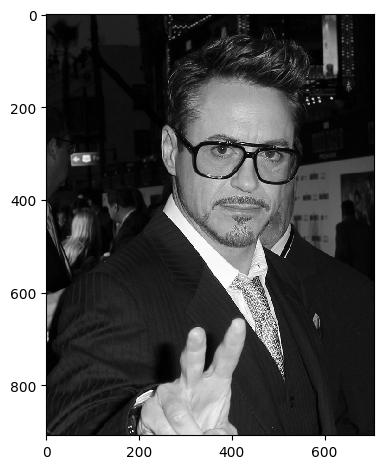

In [15]:
imshow(RDJ_G[2])

### Matrix Resizing

In [16]:
for j in range(10):
    JD=Jhonny_G[j]
    Jhonny_G[j]=resize(JD,(500,500))

In [17]:
for j in range(10):
    RDJ=RDJ_G[j]
    RDJ_G[j]=resize(RDJ,(500,500))

In [18]:
for j in range(10):
    KR=KR_G[j]
    KR_G[j]=resize(KR,(500,500))

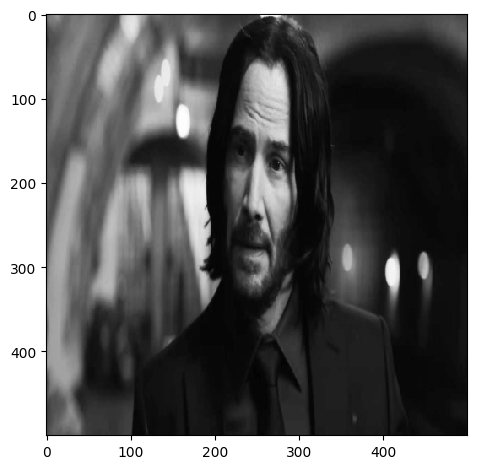

In [19]:
imshow(KR_G[3])

### Flatten the image

In [20]:
image_size_JD=Jhonny_G[2].shape
image_size_JD

(500, 500)

In [21]:
image_size_RDJ=RDJ_G[2].shape
image_size_RDJ

(500, 500)

In [22]:
image_size_KR=KR_G[2].shape
image_size_KR

(500, 500)

In [23]:
flatten_size_JD=image_size_JD[0]*image_size_JD[1]
flatten_size_JD

250000

In [24]:
flatten_size_RDJ=image_size_RDJ[0]*image_size_RDJ[1]
flatten_size_RDJ

250000

In [25]:
flatten_size_KR=image_size_KR[0]*image_size_KR[1]
flatten_size_KR

250000

In [26]:
length_of_images_JD=len(Jhonny_G)
length_of_images_JD

10

In [27]:
length_of_images_RDJ=len(RDJ_G)
length_of_images_RDJ

10

In [28]:
length_of_images_KR=len(KR_G)
length_of_images_KR

10

In [29]:
for i in range(length_of_images_JD):
    Jhonny_G[i]=np.ndarray.flatten(Jhonny_G[i]).reshape(flatten_size_JD,1)

In [30]:
for i in range(length_of_images_RDJ):
    RDJ_G[i]=np.ndarray.flatten(RDJ_G[i]).reshape(flatten_size_RDJ,1)

In [31]:
for i in range(length_of_images_KR):
    KR_G[i]=np.ndarray.flatten(KR_G[i]).reshape(flatten_size_KR,1)

### Stack the array

In [32]:
Jhonny_G=np.dstack(Jhonny_G)
Jhonny_G.shape

(250000, 1, 10)

In [33]:
RDJ_G=np.dstack(RDJ_G)
RDJ_G.shape

(250000, 1, 10)

In [34]:
KR_G=np.dstack(KR_G)
KR_G.shape

(250000, 1, 10)

In [35]:
Jhonny_G=np.rollaxis(Jhonny_G,axis=2,start=0)
Jhonny_G.shape

(10, 250000, 1)

In [36]:
#Rollaxis
RDJ_G=np.rollaxis(RDJ_G,axis=2,start=0)
RDJ_G.shape

(10, 250000, 1)

In [37]:
#Rollaxis
KR_G=np.rollaxis(KR_G,axis=2,start=0)
KR_G.shape

(10, 250000, 1)

In [38]:
#Reshape
Jhonny_G=Jhonny_G.reshape(length_of_images_JD,flatten_size_JD)
Jhonny_G.shape

(10, 250000)

In [39]:
#Reshape
RDJ_G=Jhonny_G.reshape(length_of_images_RDJ,flatten_size_RDJ)
RDJ_G.shape

(10, 250000)

In [40]:
#Reshape
KR_G=Jhonny_G.reshape(length_of_images_KR,flatten_size_KR)
KR_G.shape

(10, 250000)

### Converting Into DataFrame

In [41]:
JD_data=pd.DataFrame(Jhonny_G)
JD_data['label']='Jack Sparrow'
JD_data

,0,1,2,3,4,5,6,7,8,9,...,249991,249992,249993,249994,249995,249996,249997,249998,249999,label
0,0.216875,0.217150,0.208693,0.213284,0.199889,0.196550,0.188434,0.174071,0.165360,0.156636,...,0.221368,0.207625,0.238448,0.231049,0.203362,0.167843,0.230360,0.235658,0.162612,Jack Sparrow
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.510528,0.440250,0.441510,0.413166,0.369413,0.398799,0.290509,0.233649,0.266620,Jack Sparrow
2,0.519542,0.517601,0.519090,0.521050,0.526324,0.545834,0.558735,0.564564,0.562670,0.549223,...,0.605103,0.598037,0.592308,0.588638,0.584361,0.573368,0.564328,0.566703,0.566720,Jack Sparrow
3,0.327999,0.331020,0.332666,0.338176,0.345137,0.349411,0.353686,0.357960,0.362235,0.366509,...,0.153290,0.150277,0.146035,0.143392,0.145637,0.147473,0.145150,0.141003,0.147423,Jack Sparrow
4,0.033879,0.026379,0.018700,0.014021,0.012825,0.009333,0.006418,0.005920,0.010148,0.010358,...,0.287629,0.290627,0.285153,0.281803,0.284362,0.274908,0.279458,0.267538,0.272332,Jack Sparrow
5,0.364704,0.364704,0.364732,0.363962,0.363615,0.367021,0.371130,0.373943,0.374280,0.374504,...,0.066677,0.069159,0.069182,0.069100,0.068951,0.068617,0.068616,0.068616,0.068616,Jack Sparrow
6,0.754306,0.754173,0.759362,0.755598,0.754485,0.753496,0.757484,0.760144,0.761687,0.759556,...,0.572238,0.579391,0.583411,0.583109,0.589329,0.603798,0.606533,0.612847,0.613245,Jack Sparrow
7,0.924663,0.922440,0.920743,0.921095,0.924931,0.928087,0.924723,0.927943,0.928583,0.926836,...,0.565778,0.571966,0.569511,0.557998,0.574979,0.547204,0.538353,0.565125,0.545894,Jack Sparrow
8,0.485600,0.491191,0.488779,0.490077,0.490100,0.490892,0.495971,0.494370,0.488328,0.486176,...,0.757416,0.751922,0.751545,0.743404,0.740857,0.741943,0.735520,0.728409,0.725923,Jack Sparrow
9,0.280158,0.281036,0.284882,0.283469,0.287197,0.287716,0.295473,0.294643,0.290836,0.288614,...,0.519893,0.526290,0.528249,0.525098,0.522266,0.520092,0.524776,0.527776,0.529673,Jack Sparrow


In [42]:
RDJ_data=pd.DataFrame(RDJ_G)
RDJ_data['label']='Iron man'
RDJ_data

,0,1,2,3,4,5,6,7,8,9,...,249991,249992,249993,249994,249995,249996,249997,249998,249999,label
0,0.216875,0.217150,0.208693,0.213284,0.199889,0.196550,0.188434,0.174071,0.165360,0.156636,...,0.221368,0.207625,0.238448,0.231049,0.203362,0.167843,0.230360,0.235658,0.162612,Iron man
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.510528,0.440250,0.441510,0.413166,0.369413,0.398799,0.290509,0.233649,0.266620,Iron man
2,0.519542,0.517601,0.519090,0.521050,0.526324,0.545834,0.558735,0.564564,0.562670,0.549223,...,0.605103,0.598037,0.592308,0.588638,0.584361,0.573368,0.564328,0.566703,0.566720,Iron man
3,0.327999,0.331020,0.332666,0.338176,0.345137,0.349411,0.353686,0.357960,0.362235,0.366509,...,0.153290,0.150277,0.146035,0.143392,0.145637,0.147473,0.145150,0.141003,0.147423,Iron man
4,0.033879,0.026379,0.018700,0.014021,0.012825,0.009333,0.006418,0.005920,0.010148,0.010358,...,0.287629,0.290627,0.285153,0.281803,0.284362,0.274908,0.279458,0.267538,0.272332,Iron man
5,0.364704,0.364704,0.364732,0.363962,0.363615,0.367021,0.371130,0.373943,0.374280,0.374504,...,0.066677,0.069159,0.069182,0.069100,0.068951,0.068617,0.068616,0.068616,0.068616,Iron man
6,0.754306,0.754173,0.759362,0.755598,0.754485,0.753496,0.757484,0.760144,0.761687,0.759556,...,0.572238,0.579391,0.583411,0.583109,0.589329,0.603798,0.606533,0.612847,0.613245,Iron man
7,0.924663,0.922440,0.920743,0.921095,0.924931,0.928087,0.924723,0.927943,0.928583,0.926836,...,0.565778,0.571966,0.569511,0.557998,0.574979,0.547204,0.538353,0.565125,0.545894,Iron man
8,0.485600,0.491191,0.488779,0.490077,0.490100,0.490892,0.495971,0.494370,0.488328,0.486176,...,0.757416,0.751922,0.751545,0.743404,0.740857,0.741943,0.735520,0.728409,0.725923,Iron man
9,0.280158,0.281036,0.284882,0.283469,0.287197,0.287716,0.295473,0.294643,0.290836,0.288614,...,0.519893,0.526290,0.528249,0.525098,0.522266,0.520092,0.524776,0.527776,0.529673,Iron man


In [43]:
KR_data=pd.DataFrame(KR_G)
KR_data['label']='John Wick'
KR_data

,0,1,2,3,4,5,6,7,8,9,...,249991,249992,249993,249994,249995,249996,249997,249998,249999,label
0,0.216875,0.217150,0.208693,0.213284,0.199889,0.196550,0.188434,0.174071,0.165360,0.156636,...,0.221368,0.207625,0.238448,0.231049,0.203362,0.167843,0.230360,0.235658,0.162612,John Wick
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.510528,0.440250,0.441510,0.413166,0.369413,0.398799,0.290509,0.233649,0.266620,John Wick
2,0.519542,0.517601,0.519090,0.521050,0.526324,0.545834,0.558735,0.564564,0.562670,0.549223,...,0.605103,0.598037,0.592308,0.588638,0.584361,0.573368,0.564328,0.566703,0.566720,John Wick
3,0.327999,0.331020,0.332666,0.338176,0.345137,0.349411,0.353686,0.357960,0.362235,0.366509,...,0.153290,0.150277,0.146035,0.143392,0.145637,0.147473,0.145150,0.141003,0.147423,John Wick
4,0.033879,0.026379,0.018700,0.014021,0.012825,0.009333,0.006418,0.005920,0.010148,0.010358,...,0.287629,0.290627,0.285153,0.281803,0.284362,0.274908,0.279458,0.267538,0.272332,John Wick
5,0.364704,0.364704,0.364732,0.363962,0.363615,0.367021,0.371130,0.373943,0.374280,0.374504,...,0.066677,0.069159,0.069182,0.069100,0.068951,0.068617,0.068616,0.068616,0.068616,John Wick
6,0.754306,0.754173,0.759362,0.755598,0.754485,0.753496,0.757484,0.760144,0.761687,0.759556,...,0.572238,0.579391,0.583411,0.583109,0.589329,0.603798,0.606533,0.612847,0.613245,John Wick
7,0.924663,0.922440,0.920743,0.921095,0.924931,0.928087,0.924723,0.927943,0.928583,0.926836,...,0.565778,0.571966,0.569511,0.557998,0.574979,0.547204,0.538353,0.565125,0.545894,John Wick
8,0.485600,0.491191,0.488779,0.490077,0.490100,0.490892,0.495971,0.494370,0.488328,0.486176,...,0.757416,0.751922,0.751545,0.743404,0.740857,0.741943,0.735520,0.728409,0.725923,John Wick
9,0.280158,0.281036,0.284882,0.283469,0.287197,0.287716,0.295473,0.294643,0.290836,0.288614,...,0.519893,0.526290,0.528249,0.525098,0.522266,0.520092,0.524776,0.527776,0.529673,John Wick


### DataFrame Concatination

In [44]:
Actors=pd.concat([JD_data,RDJ_data])

In [45]:
Actorss=pd.concat([Actors,KR_data])

In [46]:
Actorss

,0,1,2,3,4,5,6,7,8,9,...,249991,249992,249993,249994,249995,249996,249997,249998,249999,label
0,0.216875,0.217150,0.208693,0.213284,0.199889,0.196550,0.188434,0.174071,0.165360,0.156636,...,0.221368,0.207625,0.238448,0.231049,0.203362,0.167843,0.230360,0.235658,0.162612,Jack Sparrow
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.510528,0.440250,0.441510,0.413166,0.369413,0.398799,0.290509,0.233649,0.266620,Jack Sparrow
2,0.519542,0.517601,0.519090,0.521050,0.526324,0.545834,0.558735,0.564564,0.562670,0.549223,...,0.605103,0.598037,0.592308,0.588638,0.584361,0.573368,0.564328,0.566703,0.566720,Jack Sparrow
3,0.327999,0.331020,0.332666,0.338176,0.345137,0.349411,0.353686,0.357960,0.362235,0.366509,...,0.153290,0.150277,0.146035,0.143392,0.145637,0.147473,0.145150,0.141003,0.147423,Jack Sparrow
4,0.033879,0.026379,0.018700,0.014021,0.012825,0.009333,0.006418,0.005920,0.010148,0.010358,...,0.287629,0.290627,0.285153,0.281803,0.284362,0.274908,0.279458,0.267538,0.272332,Jack Sparrow
5,0.364704,0.364704,0.364732,0.363962,0.363615,0.367021,0.371130,0.373943,0.374280,0.374504,...,0.066677,0.069159,0.069182,0.069100,0.068951,0.068617,0.068616,0.068616,0.068616,Jack Sparrow
6,0.754306,0.754173,0.759362,0.755598,0.754485,0.753496,0.757484,0.760144,0.761687,0.759556,...,0.572238,0.579391,0.583411,0.583109,0.589329,0.603798,0.606533,0.612847,0.613245,Jack Sparrow
7,0.924663,0.922440,0.920743,0.921095,0.924931,0.928087,0.924723,0.927943,0.928583,0.926836,...,0.565778,0.571966,0.569511,0.557998,0.574979,0.547204,0.538353,0.565125,0.545894,Jack Sparrow
8,0.485600,0.491191,0.488779,0.490077,0.490100,0.490892,0.495971,0.494370,0.488328,0.486176,...,0.757416,0.751922,0.751545,0.743404,0.740857,0.741943,0.735520,0.728409,0.725923,Jack Sparrow
9,0.280158,0.281036,0.284882,0.283469,0.287197,0.287716,0.295473,0.294643,0.290836,0.288614,...,0.519893,0.526290,0.528249,0.525098,0.522266,0.520092,0.524776,0.527776,0.529673,Jack Sparrow


### Shuffling 

In [47]:
from sklearn.utils import shuffle

In [48]:
Hollywood_indexed=shuffle(Actorss).reset_index()
Hollywood_indexed

,index,0,1,2,3,4,5,6,7,8,...,249991,249992,249993,249994,249995,249996,249997,249998,249999,label
0,8,0.485600,0.491191,0.488779,0.490077,0.490100,0.490892,0.495971,0.494370,0.488328,...,0.757416,0.751922,0.751545,0.743404,0.740857,0.741943,0.735520,0.728409,0.725923,Iron man
1,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.510528,0.440250,0.441510,0.413166,0.369413,0.398799,0.290509,0.233649,0.266620,Jack Sparrow
2,8,0.485600,0.491191,0.488779,0.490077,0.490100,0.490892,0.495971,0.494370,0.488328,...,0.757416,0.751922,0.751545,0.743404,0.740857,0.741943,0.735520,0.728409,0.725923,John Wick
3,4,0.033879,0.026379,0.018700,0.014021,0.012825,0.009333,0.006418,0.005920,0.010148,...,0.287629,0.290627,0.285153,0.281803,0.284362,0.274908,0.279458,0.267538,0.272332,John Wick
4,9,0.280158,0.281036,0.284882,0.283469,0.287197,0.287716,0.295473,0.294643,0.290836,...,0.519893,0.526290,0.528249,0.525098,0.522266,0.520092,0.524776,0.527776,0.529673,John Wick
5,4,0.033879,0.026379,0.018700,0.014021,0.012825,0.009333,0.006418,0.005920,0.010148,...,0.287629,0.290627,0.285153,0.281803,0.284362,0.274908,0.279458,0.267538,0.272332,Jack Sparrow
6,0,0.216875,0.217150,0.208693,0.213284,0.199889,0.196550,0.188434,0.174071,0.165360,...,0.221368,0.207625,0.238448,0.231049,0.203362,0.167843,0.230360,0.235658,0.162612,Jack Sparrow
7,6,0.754306,0.754173,0.759362,0.755598,0.754485,0.753496,0.757484,0.760144,0.761687,...,0.572238,0.579391,0.583411,0.583109,0.589329,0.603798,0.606533,0.612847,0.613245,Jack Sparrow
8,0,0.216875,0.217150,0.208693,0.213284,0.199889,0.196550,0.188434,0.174071,0.165360,...,0.221368,0.207625,0.238448,0.231049,0.203362,0.167843,0.230360,0.235658,0.162612,Iron man
9,2,0.519542,0.517601,0.519090,0.521050,0.526324,0.545834,0.558735,0.564564,0.562670,...,0.605103,0.598037,0.592308,0.588638,0.584361,0.573368,0.564328,0.566703,0.566720,Jack Sparrow


In [49]:
Hollywood_indexed=Hollywood_indexed.drop(['index'],axis=1)
Hollywood_indexed

,0,1,2,3,4,5,6,7,8,9,...,249991,249992,249993,249994,249995,249996,249997,249998,249999,label
0,0.485600,0.491191,0.488779,0.490077,0.490100,0.490892,0.495971,0.494370,0.488328,0.486176,...,0.757416,0.751922,0.751545,0.743404,0.740857,0.741943,0.735520,0.728409,0.725923,Iron man
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.510528,0.440250,0.441510,0.413166,0.369413,0.398799,0.290509,0.233649,0.266620,Jack Sparrow
2,0.485600,0.491191,0.488779,0.490077,0.490100,0.490892,0.495971,0.494370,0.488328,0.486176,...,0.757416,0.751922,0.751545,0.743404,0.740857,0.741943,0.735520,0.728409,0.725923,John Wick
3,0.033879,0.026379,0.018700,0.014021,0.012825,0.009333,0.006418,0.005920,0.010148,0.010358,...,0.287629,0.290627,0.285153,0.281803,0.284362,0.274908,0.279458,0.267538,0.272332,John Wick
4,0.280158,0.281036,0.284882,0.283469,0.287197,0.287716,0.295473,0.294643,0.290836,0.288614,...,0.519893,0.526290,0.528249,0.525098,0.522266,0.520092,0.524776,0.527776,0.529673,John Wick
5,0.033879,0.026379,0.018700,0.014021,0.012825,0.009333,0.006418,0.005920,0.010148,0.010358,...,0.287629,0.290627,0.285153,0.281803,0.284362,0.274908,0.279458,0.267538,0.272332,Jack Sparrow
6,0.216875,0.217150,0.208693,0.213284,0.199889,0.196550,0.188434,0.174071,0.165360,0.156636,...,0.221368,0.207625,0.238448,0.231049,0.203362,0.167843,0.230360,0.235658,0.162612,Jack Sparrow
7,0.754306,0.754173,0.759362,0.755598,0.754485,0.753496,0.757484,0.760144,0.761687,0.759556,...,0.572238,0.579391,0.583411,0.583109,0.589329,0.603798,0.606533,0.612847,0.613245,Jack Sparrow
8,0.216875,0.217150,0.208693,0.213284,0.199889,0.196550,0.188434,0.174071,0.165360,0.156636,...,0.221368,0.207625,0.238448,0.231049,0.203362,0.167843,0.230360,0.235658,0.162612,Iron man
9,0.519542,0.517601,0.519090,0.521050,0.526324,0.545834,0.558735,0.564564,0.562670,0.549223,...,0.605103,0.598037,0.592308,0.588638,0.584361,0.573368,0.564328,0.566703,0.566720,Jack Sparrow


In [50]:
Hollywood_indexed.to_csv('Actors.csv')

### Assigning Dependent And Independent Variables 

In [51]:
x=Hollywood_indexed.values[:,:-1]

In [52]:
y=Hollywood_indexed.values[:,-1]

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=0)

In [55]:
x_train.shape

(15, 250000)

In [56]:
x_test.shape

(15, 250000)

In [57]:
y_train.shape

(15,)

In [58]:
y_test.shape

(15,)

In [59]:
#PCA
from sklearn import decomposition

In [60]:
pca=decomposition.PCA(n_components=15, whiten=True, random_state=1)

In [61]:
pca.fit(x_train)

PCA(n_components=15, random_state=1, whiten=True)

In [62]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [63]:
x_train_pca.shape

(15, 15)

In [64]:
x_test_pca.shape

(15, 15)

In [65]:
# Viewing the principle components or eigen faces
eigen = (np.reshape(x[10],(500,500)).astype(np.float64))

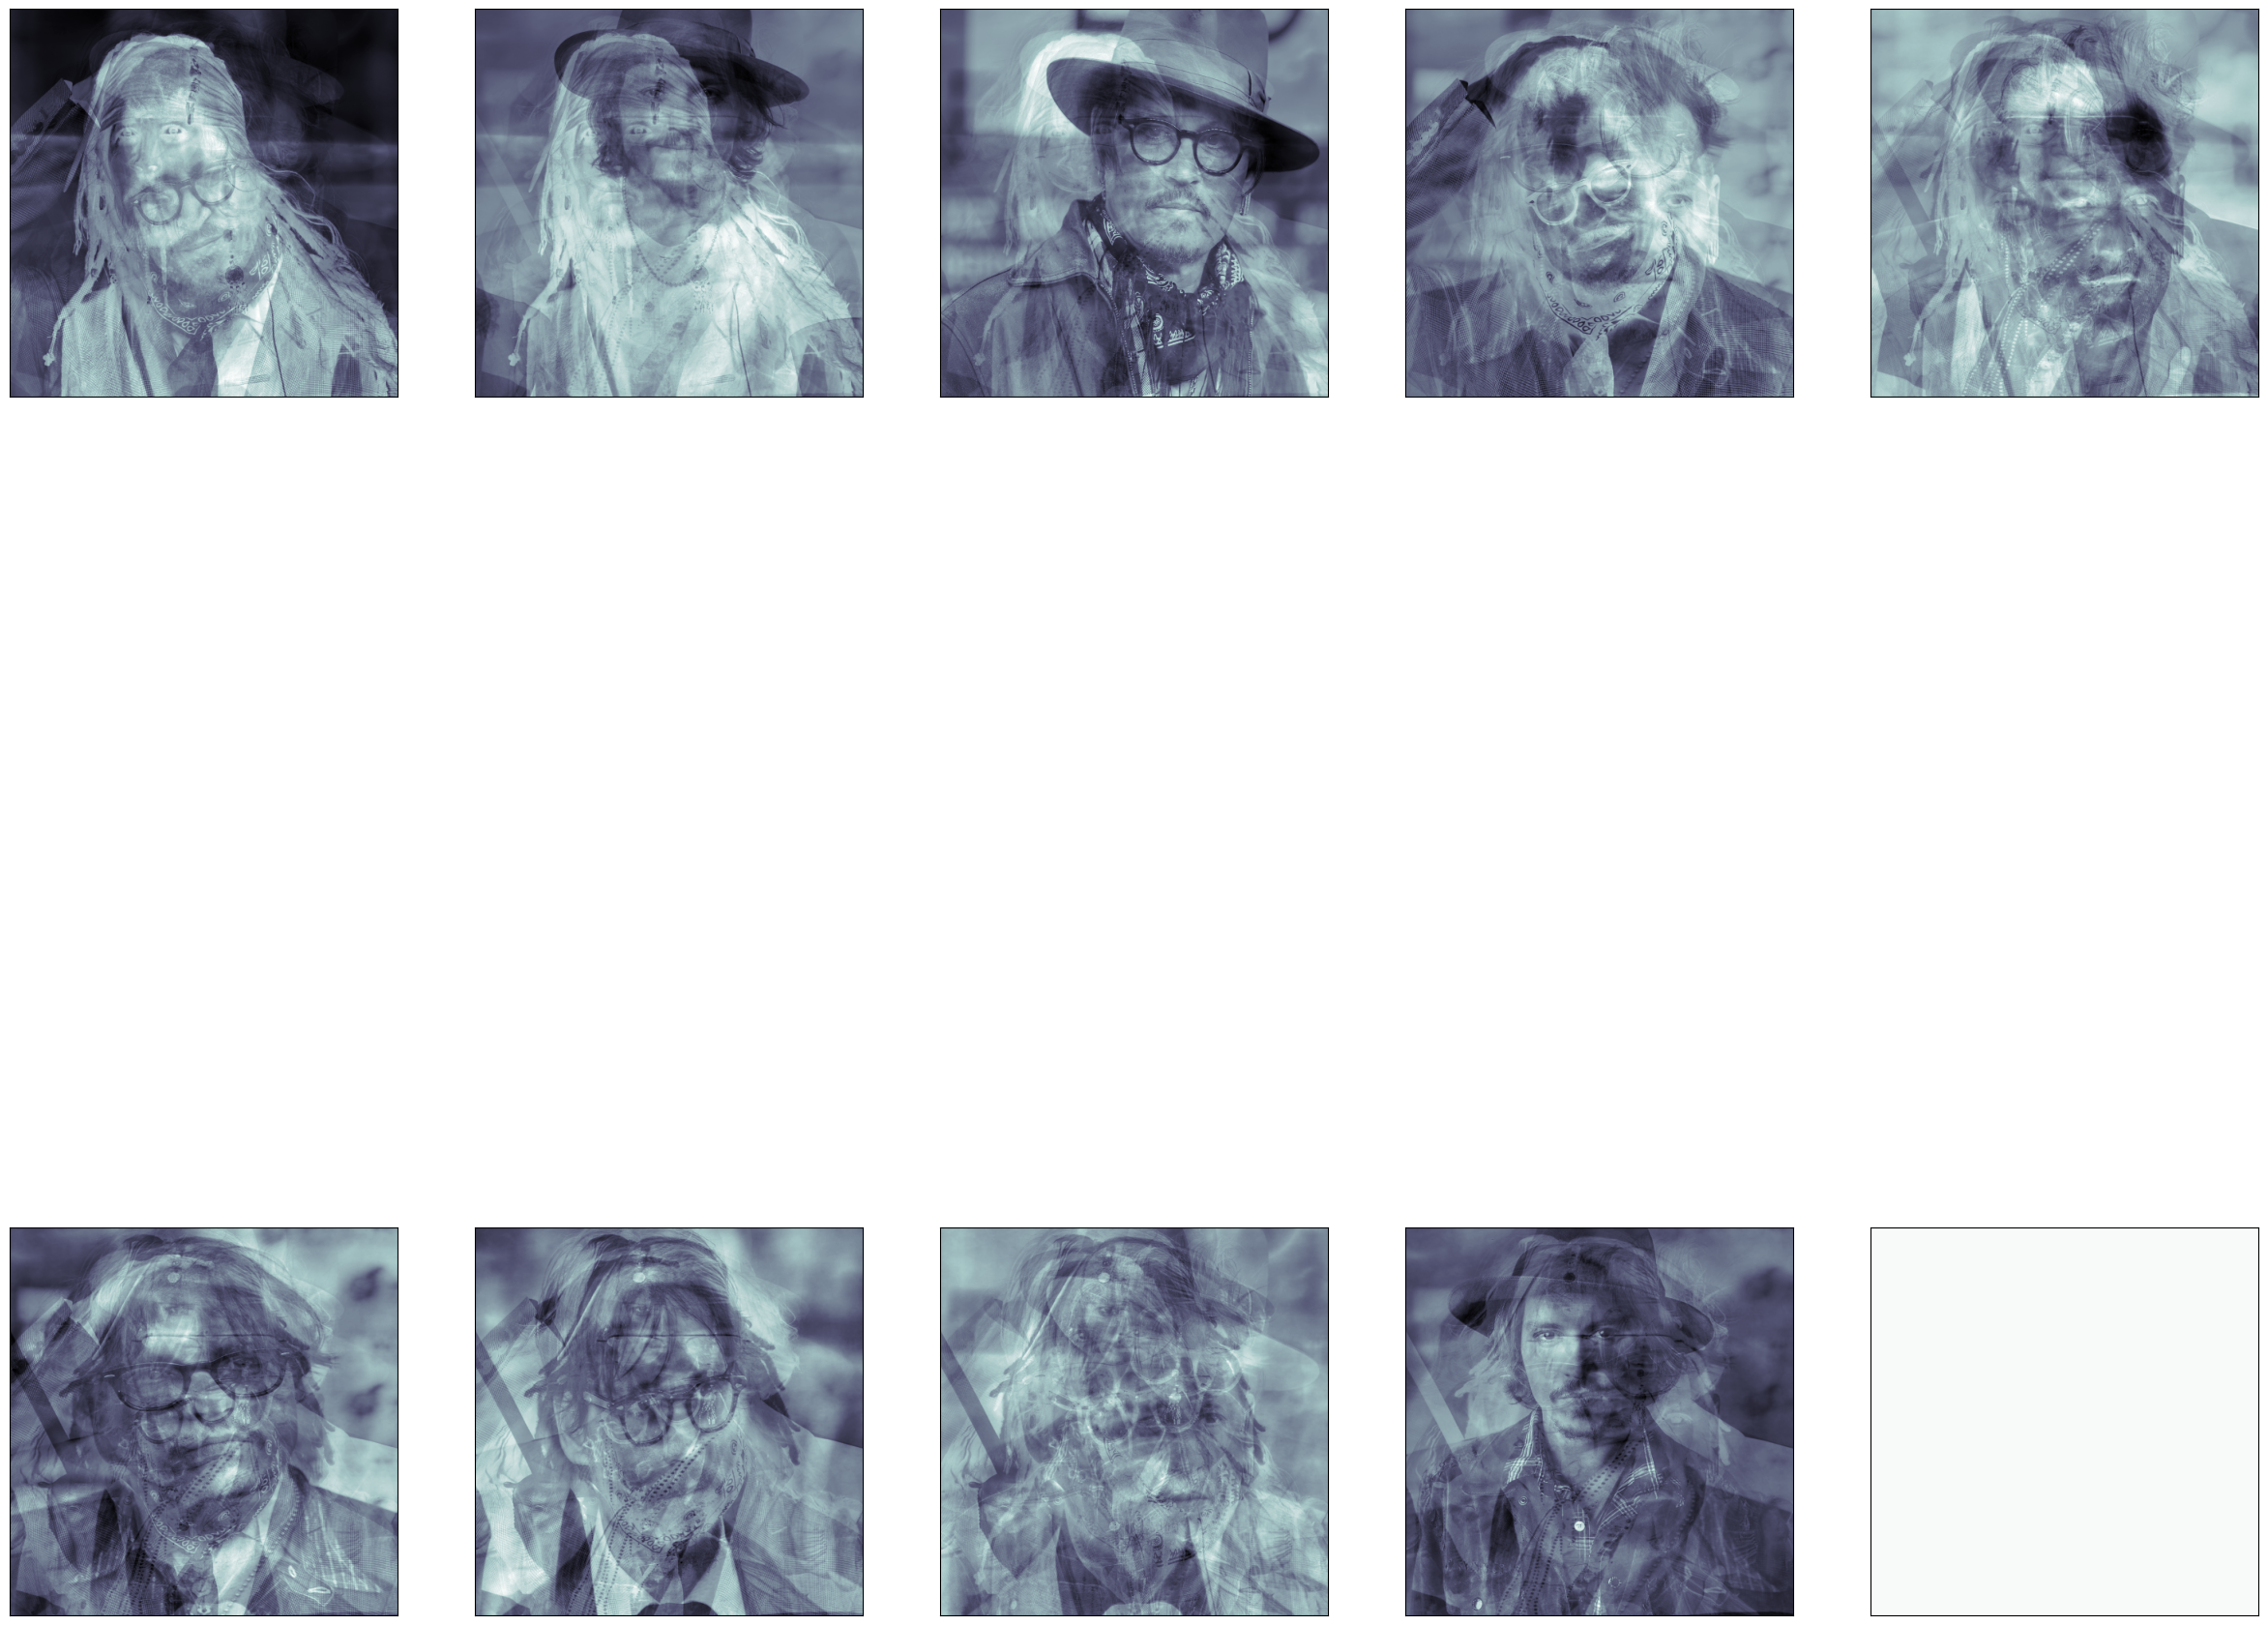

In [66]:
fig=plt.figure(figsize=(30,30))
for i in range(10):
    ax=fig.add_subplot(2,5, i+1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(eigen.shape), cmap=plt.cm.bone)

In [67]:
from sklearn import svm

In [68]:
#support vector machine
clf = svm.SVC(C=2, gamma=0.006, kernel='rbf')
clf.fit(x_train_pca, y_train)

SVC(C=2, gamma=0.006)